In [130]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
# import matplotlib.pyplot
# matplotlib.pyplot.plot()
# import matplotlib.pyplot as plt
# plt.plot()

import warnings                  # warning 무시

warnings.filterwarnings('ignore') # warning 무시

font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [ ]:
# df.plot(kind = 'line')
# df.plot(kind = 'bar')
# df.plot(kind = 'box')
# df.plot(kind = 'scatter')

# plt.plot()
# plot.bar()
# plot.box()
# plot.scatter()

In [4]:
df = pd.read_excel('excel/시도별_전출입_인구수.xlsx')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,7629098,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155,6128738
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,1573594,1589431,1515602,1472937,1439707,1426493,1578127,1418187,1201527,1206963
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,485710,507031,459015,439073,416095,411704,491829,441323,383848,364271
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,350213,351424,328228,321182,321158,312419,347248,304761,265354,296291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전북특별자치도,139,202,141,210,219,415,392,408,...,609,683,733,768,902,1032,1007,986,878,975
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,928,1062,1127,1102,1254,1302,1466,1326,1194,1109
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,728,903,931,994,1146,1229,1181,1261,1177,1161
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1223,1500,1448,1501,1780,1825,1861,1947,1798,1783


In [15]:
df = df.drop(0,axis = 'index')

In [30]:
df['전출지별']=df['전출지별'].ffill()
df

KeyError: '전출지별'

In [ ]:
df = df.rename({'전출지별':'전출지','전입지별':'전입지'},axis = 'columns')

In [31]:
df

,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,7629098,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155,6128738
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,1573594,1589431,1515602,1472937,1439707,1426493,1578127,1418187,1201527,1206963
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,485710,507031,459015,439073,416095,411704,491829,441323,383848,364271
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,350213,351424,328228,321182,321158,312419,347248,304761,265354,296291
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,452297,473223,441646,409465,433639,420014,444556,433137,395140,424127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전북특별자치도,139,202,141,210,219,415,392,408,...,609,683,733,768,902,1032,1007,986,878,975
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,928,1062,1127,1102,1254,1302,1466,1326,1194,1109
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,728,903,931,994,1146,1229,1181,1261,1177,1161
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1223,1500,1448,1501,1780,1825,1861,1947,1798,1783


In [41]:
# 전출지가 서울이고, # 전입지가 서울이 아닌 data 찾기
# iloc 이용
df2 = df.iloc[18:36]
df2 = df2.drop(20, axis = 'index')
df2 = df2.drop('전출지',axis = 'columns')
df2 = df2.set_index('전입지')
df2

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,1661425,1726687,1655859,1571423,1549937,1476081,1642977,1524430,1236867,1238213
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17320,17009,15062,14484,13093,12805,13209,13078,11532,11748
대구광역시,-,-,-,-,-,-,-,-,-,-,...,10062,10191,9623,8891,8446,7897,8792,8350,7716,8289
인천광역시,-,-,-,-,-,-,-,-,-,-,...,43212,44915,43745,40485,41233,38571,39875,44859,43887,45942
광주광역시,-,-,-,-,-,-,-,-,-,-,...,9759,9216,8354,7932,7378,7014,7178,7145,6159,6120
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13403,13453,12619,11815,11591,10759,11033,11144,10454,10234
울산광역시,-,-,-,-,-,-,-,-,-,-,...,6047,5950,5102,4260,4086,3827,4085,4065,3584,3655
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,6481,7550,5943,5813,5861,5919,5546,5580,4892,4301
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,332785,359337,370760,342433,368536,334293,375867,362116,279731,279375


In [50]:
# mask이용
(df['전출지'] == '서울특별시').values
(df['전입지'] != '서울특별시').values

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [54]:
mask = (df['전출지'] == '서울특별시') & (df['전입지'] != '서울특별시') # & 대신 and를 쓰면 안되나?
df3 = df[mask]
df3 = df3.drop('전출지', axis = 'columns')
df3 = df3.set_index('전입지')
df3.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,1661425,1726687,1655859,1571423,1549937,1476081,1642977,1524430,1236867,1238213
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17320,17009,15062,14484,13093,12805,13209,13078,11532,11748
대구광역시,-,-,-,-,-,-,-,-,-,-,...,10062,10191,9623,8891,8446,7897,8792,8350,7716,8289
인천광역시,-,-,-,-,-,-,-,-,-,-,...,43212,44915,43745,40485,41233,38571,39875,44859,43887,45942
광주광역시,-,-,-,-,-,-,-,-,-,-,...,9759,9216,8354,7932,7378,7014,7178,7145,6159,6120


1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: int64


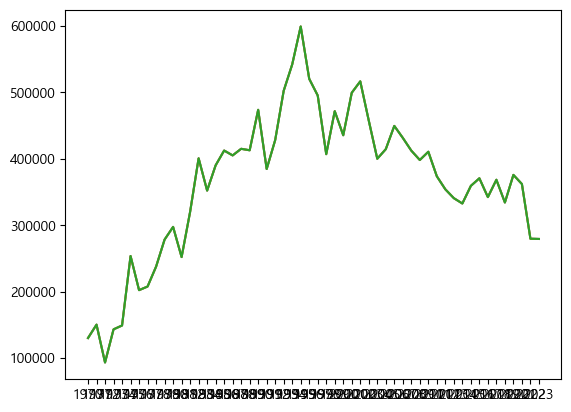

In [66]:
# 서울특별시에서 전출하여 경기도로 전입한 정보만 조회 -> Series
sr1 = df3.loc['경기도']
sr1.values
sr1 = sr1.map(int)
print(sr1[:5])

# plt(matplotlib.pyplot)
# plt.plot(시리즈)       : 선그래프, 시리즈의 index가 x 축으로 위치
#                                    시리즈의 values가 데이터
plt.plot(sr1)
sr1.index[:5].values  #: index가 문자라서 아래 그래프가 깨짐

# plt.plot(x축, 데이터) : 선그래프, 앞의 데이터가 x 축
#                                   뒤의 데이터가 데이터
plt.plot(sr1.index, sr1.values)  # 위의 것과 같은 그래프이다.

year = sr1.index
data = sr1.values
plt.plot(year,data)


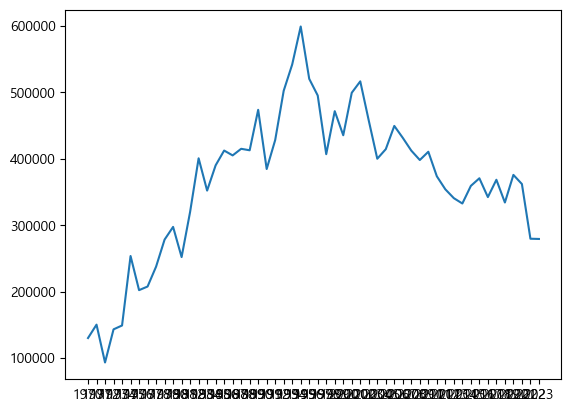

In [67]:
year = sr1.index
data = sr1.values
plt.plot(year,data)

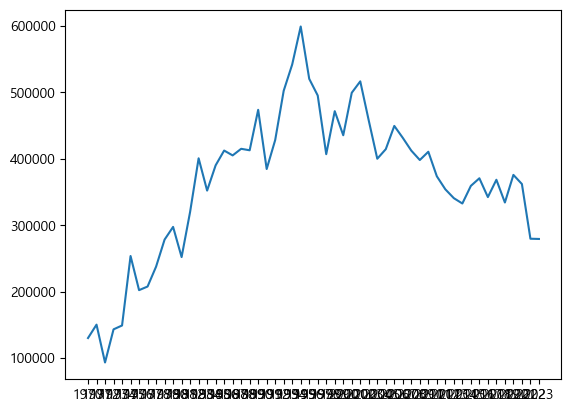

In [68]:
plt.plot(sr1) # 가장 쉽게 하는 방법, 알아서 나눠줌

In [71]:
# x 축 데이터가 문자인 경우 모든 값을 나열하여 겹치는 증상이 보이는 경우가 많다.
sr1.index.values
sr1.index = sr1.index.map(int)
sr1.index

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

Text(0.5, 1.0, '서울시 -> 경기도 인구 이동')

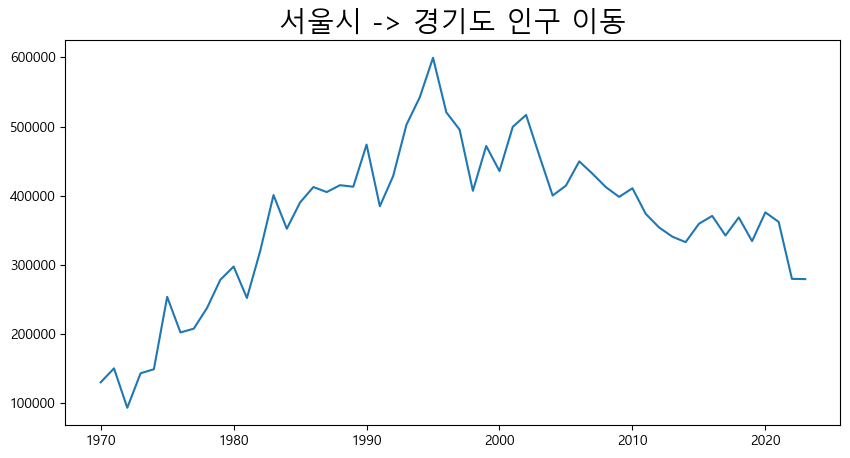

In [79]:
plt.figure(figsize = (10,5))  # -> 크기 정하려면 이걸 먼저 해야 하는 듯.
plt.plot(sr1)
plt.title('서울시 -> 경기도 인구 이동', size = 20)

In [ ]:
#그래프 그리는 프로세스
# 1. 모형의 크기
# plt.figure(figsize = (행, 열))

# 2. 그래프 그리기
# plt.plot(시리즈)
# plt.bar(시리즈)
# plt.scatter()
# plt.pie(시리즈)

# 3. 그래프 꾸미기
# plt.title('제목')
# plt.xlabel('x축 제목')
# plt.ylabel('y축 제목')
# plt.xticks(rotation = 각도)
# plt.yticks(rotation = 각도)
# plt.legend(범례)

# 4. 그래프 출력 및 저장
# plt.show()
# plt.savefig()

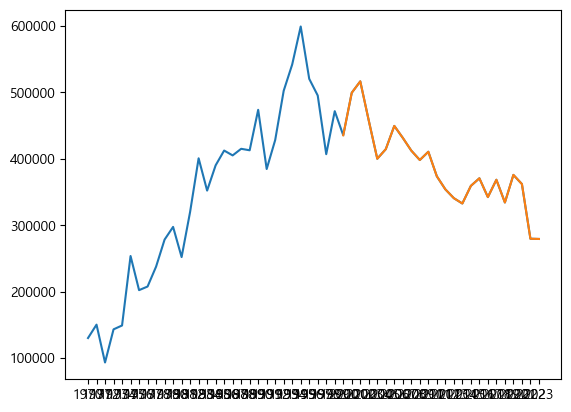

In [91]:
sr2 = df3.loc['경기도']
plt.plot(sr2) # sr2가 object인데 보이긴 한다. 그래도 정제작업 필요
#sr2.values.map(int) # -> 이건 안된다. 판다스가 아닌 array에는 지원하지 않는다.
sr2 = sr2.map(int) # -> 정수로만든다.


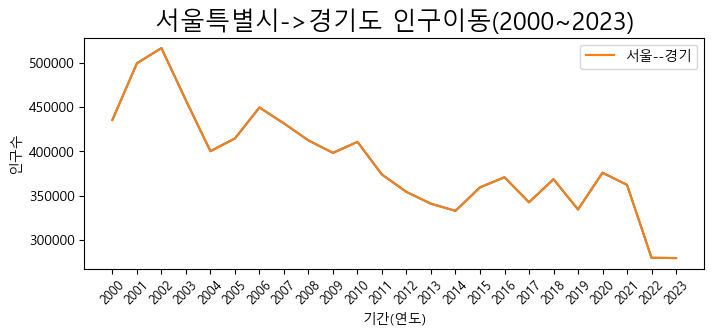

In [123]:
# 2000~2023 사이에 서울->경기 인구이동
sr2 = sr2['2000':]

# 1. 모형의 크기
plt.figure(figsize = (8,3))

# 2. 그래프 그리기
plt.plot(sr2)
plt.plot(sr2, label = '서울--경기')

# 3. 그래프 꾸미기
plt.title('서울특별시->경기도 인구이동(2000~2023)',size = 18)
plt.xticks(rotation = 45,size = 9)
plt.xlabel('기간(연도)',size =10)
plt.ylabel('인구수',size =10)
#plt.legend(labels = ['서울->경기']) # 그래프그리기에서 해도 된다.
#plt.legend(loc = 'lower left')
plt.legend(loc = 'best')

# 4. 그래프 출력 및 저장
plt.show()
plt.savefig()

In [128]:
print(plt.style.available) # 사용가능한 스타일 목록 보기

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


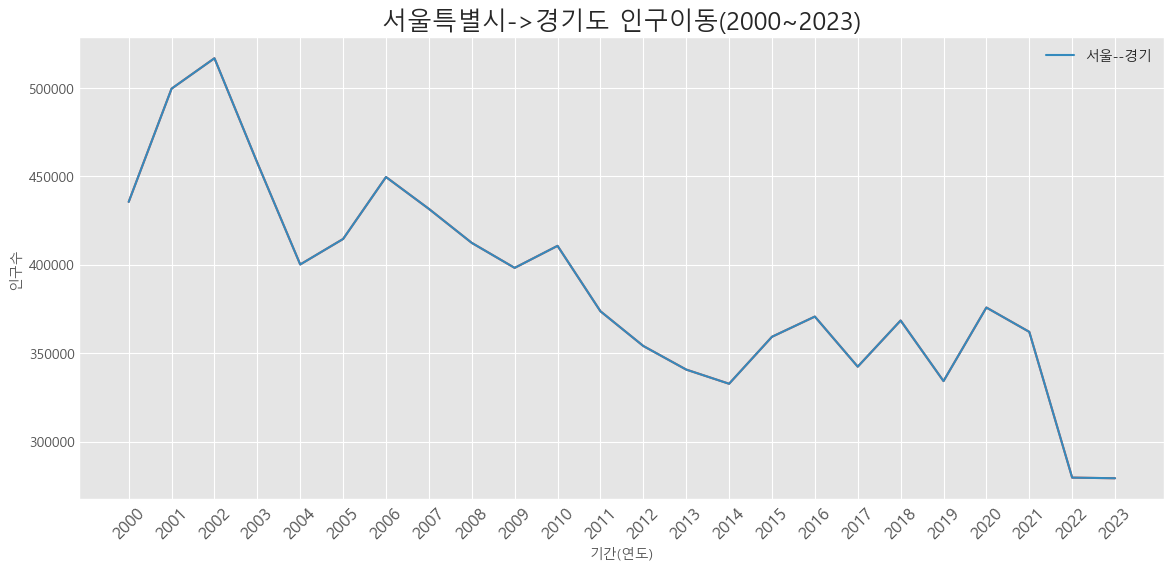

In [131]:
# 0 테마(스타일)
plt.style.use('ggplot')

# 1. 모형의 크기
plt.figure(figsize = (14,6))

# 2. 그래프 그리기
plt.plot(sr2)
plt.plot(sr2, label = '서울--경기')

# 3. 그래프 꾸미기
plt.title('서울특별시->경기도 인구이동(2000~2023)',size = 18)
plt.xticks(rotation = 45,size = 12)
plt.xlabel('기간(연도)',size =10)
plt.ylabel('인구수',size =10)
#plt.legend(labels = ['서울->경기']) # 그래프그리기에서 해도 된다.
#plt.legend(loc = 'lower left')
plt.legend(loc = 'best')

# 4. 그래프 출력 및 저장
plt.show()

In [ ]:
# 여러개의 2개 이상 그래프 합쳐서 만들기

# 1. 모형의 크기
# figure = plt.figure(figsize = (행크기, 열크기))

# 2. 여러개의 서브플롯 생성
# figure.add_subplot(행수, 열수, 위치)
# ax1 = figure.add_subplot(2,3,1)
# ax2 = figure.add_subplot(2,3,2)
# ax3 = figure.add_subplot(2,3,3)

# 2. 그래프 그리기
# ax1.plot()
# ax2.plot()
# ax3.bar()
# ax4.pie()

# 3. 그래프 꾸미기
# ax1.set_메소드()
# ax2.set_메소드()
# ax3.set_메소드()

# 4. 그래프 출력 및 저장
# plt.show()
# plt.savefig()

<BarContainer object of 24 artists>

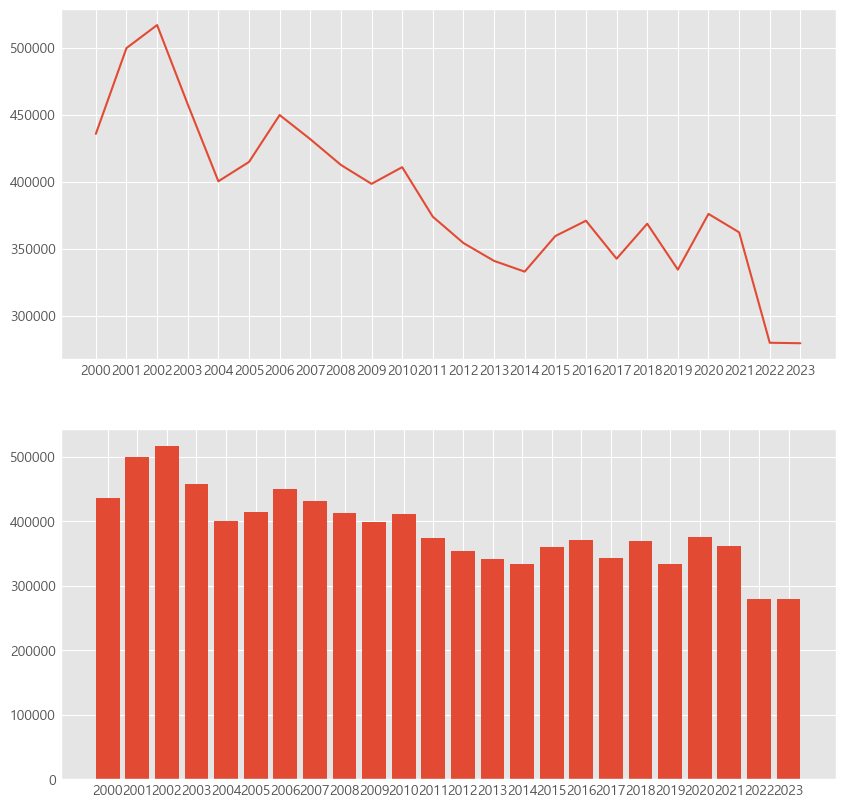

In [143]:
figure = plt.figure(figsize = (10,10))
ax1 = figure.add_subplot(2,1,1)
ax2 = figure.add_subplot(2,1,2)
ax1.plot(sr2,ls='--') #ls : line style
ax2.bar(x = sr2.index, height = sr2.values)

Text(0.5, 1.0, '제목2')

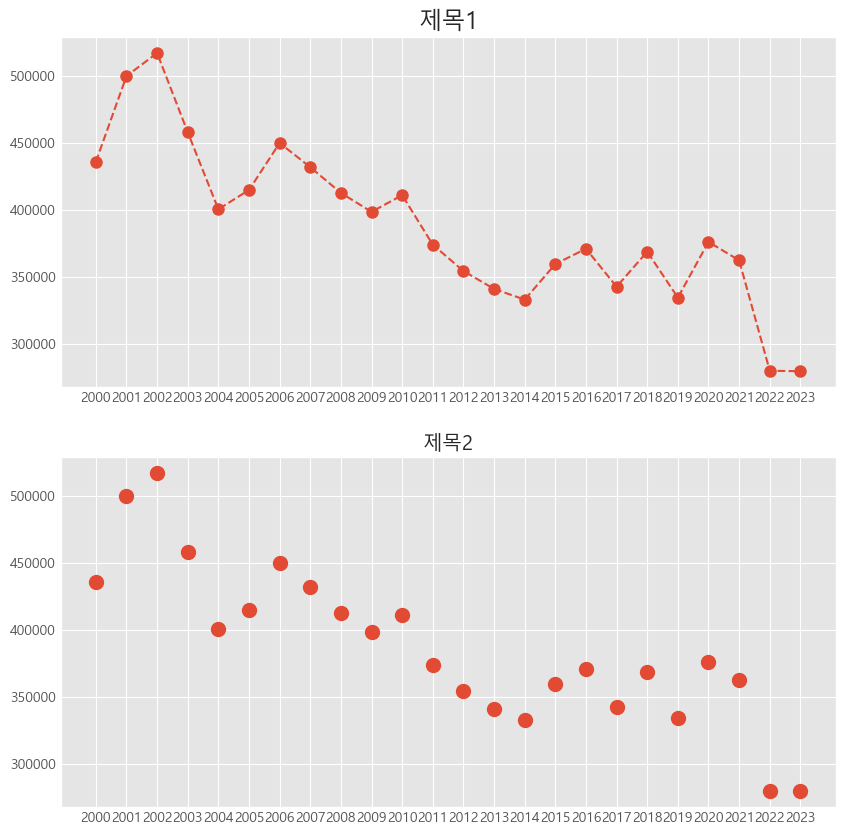

In [155]:
figure = plt.figure(figsize = (10,10))
ax1 = figure.add_subplot(2,1,1)
ax2 = figure.add_subplot(2,1,2)
ax1.plot(sr2,ls='--', marker = 'o', markersize = 8) #ls : line style
ax2.plot(sr2, 'o',markersize = 10, )
ax1.set_title('제목1', size=17)
ax2.set_title('제목2')